In [2]:
# Activation functions
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


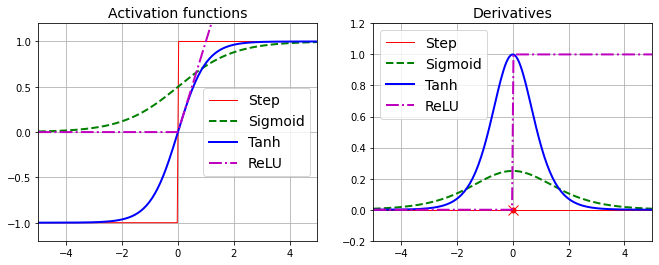

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
z = np.linspace(-5, 5, 200)


plt.figure(figsize=(11,4))


plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="top left", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [4]:
import tensorflow as tf
from tensorflow import keras

fashion_minst = keras.datasets.fashion_mnist
(X_train_full , Y_train_full) ,(X_test , Y_test) = fashion_minst.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape
# keras splits the data but it does not create a validation set , so we will create this ourselves , also scaling the pixels to take values 0-1 will also help in the learing of NN

(60000, 28, 28)

In [6]:
X_valid , X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
Y_valid , Y_train = Y_train_full[:5000] , Y_train_full[5000:]
# we need to categotrize the classed as this time it will be hard to deal with 10 calsses that dont represrnt a drawn number but a cloth type.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]



In [7]:
# now lets create a model 
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape = [28 , 28]), 
                                 keras.layers.Dense(300 , activation = "relu"), 
                                 keras.layers.Dense( 100 , activation = "relu"), 
                                 keras.layers.Dense( 10 , activation = "softmax")
])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


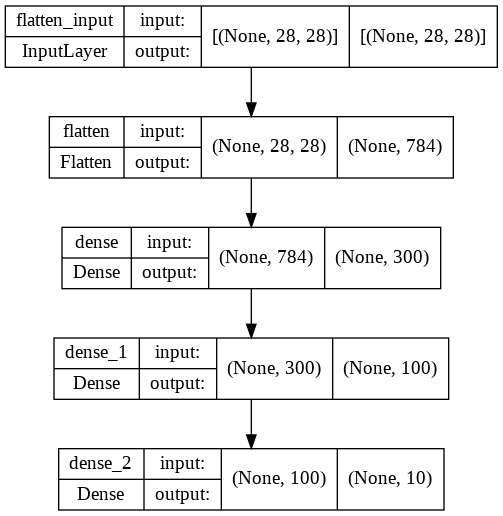

In [8]:
model.summary()
## or we can create an image to see further details more clearly
keras.utils.plot_model(model , "fashion_model.png", show_shapes= True)

In [9]:
# we can view the layers and the paremetrs of the currnent NN
model.layers

hidden_layer_1 = model.layers[1]
hidden_layer_1.name

'dense'

In [10]:
W , b = hidden_layer_1.get_weights()
print(W)
print(W.shape)
print(b)

## this validates that the initial Weights must be random to achive a real diverse learning across all the neurons

[[-0.05799966 -0.03760129 -0.05009376 ... -0.03986434  0.07404827
   0.07055022]
 [ 0.02468325  0.0055232  -0.03551539 ...  0.03799317 -0.02521268
  -0.03029065]
 [ 0.02776865 -0.01014421 -0.05569555 ...  0.01816026 -0.00585183
  -0.02195845]
 ...
 [ 0.07365863  0.06727374 -0.01610544 ... -0.03656792 -0.0622162
  -0.01591063]
 [ 0.0412196   0.03283658  0.05776082 ... -0.02352539  0.04205299
   0.01192358]
 [-0.00196321  0.06668454  0.03343344 ...  0.06612675  0.05850138
  -0.00778894]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [11]:
## next we need to complile the model using the complile function.


model.compile(loss="sparse_categorical_crossentropy" ,
              optimizer = "sgd" ,
              metrics=["accuracy"])


In [12]:
print(X_train.shape
      )
history = model.fit(X_train , Y_train , epochs=30 , validation_data=(X_valid , Y_valid))

(55000, 28, 28)
Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7031 - accuracy: 0.7672 - val_loss: 0.4955 - val_accuracy: 0.8386
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4839 - accuracy: 0.8321 - val_loss: 0.4631 - val_accuracy: 0.8376
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4397 - accuracy: 0.8459 - val_loss: 0.4184 - val_accuracy: 0.8572
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4143 - accuracy: 0.8551 - val_loss: 0.3851 - val_accuracy: 0.8670
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3946 - accuracy: 0.8612 - val_loss: 0.3822 - val_accuracy: 0.8696
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3784 - accuracy: 0.8666 - val_loss: 0.3791 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3669 - accuracy: 0.8703 - val_loss: 0.3587

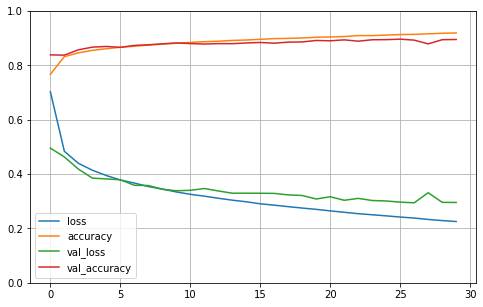

In [13]:
## we need to plot these figures now 

import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

if you have a skewed dataset with some classes being underrepresented or overrepresented , it is advisable when calling fit() to set the class_weight argument to true , this will tend to be more tolerant when calculating the erros in the overrepresented class. If you need specific weights use the sample weight argument , if both are used Keras will choose to multiply the weights together.
one more tip , if the model accuracy is not good , try fitting the model again ,
keras starts from where it ends , this means simply you will have more epoches 
and will arrive at a global min faster.
If still not satisfied try tuning the hyper parameter ( always start with the learning rate this is the most effective) ( next you can try playing with the optimizer and make sure to retune the learning rate every time for control ).
Your last card is to play with the model hyperparamters ( the no of layers and the no of neurons per layer )or even the number of instances trained per Batch

when satisfied with tha validation accuracy use the mode accuracy to check the model's performance on the test set.



In [14]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 62.1720 - accuracy: 0.8520


[62.17196273803711, 0.8519999980926514]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


<Figure size 518.4x172.8 with 0 Axes>

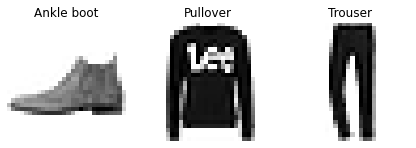

In [22]:
X_sample_test = X_test[:3]
## we are using a softmax activation fn for the output layer the output is expected to be probabilities of belonging to every class
Y_prob = model.predict(X_sample_test)
print( Y_prob)

### then to get the class number of every image use the argmax fuction
sample_predictions = np.argmax(model.predict(X_sample_test) , axis = -1)
print( sample_predictions)

print( np.asarray(class_names)[sample_predictions])

## now lets verify this that it is true
plt.figure(figsize=(7.2 , 2.4))


plt.figure(figsize=(7.2, 2.4))

for index , image in enumerate(X_sample_test):
  plt.subplot( 1, 3, index + 1) # 0 indexed
  plt.imshow(image , cmap="binary" , interpolation="nearest")
  plt.axis("off")
  plt.title(class_names[Y_test[index]] , fontsize =12)


plt.show()
